In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from Mesh_1D import Mesh_1D
from FEM_nonlinear import FEM_nonlinear
from GL_quad import GL_Quadrature
from solvers import non_linear
%matplotlib inline

[952.88496661 952.88413423 952.8816371  ... 301.4308171  300.47777649
 299.52465387]


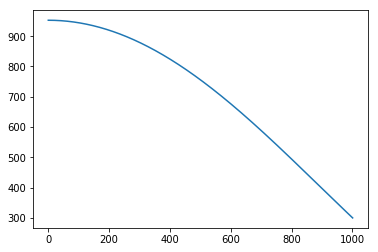

In [2]:
# create quadrature
GL=GL_Quadrature(2, False)
# create mesh: widths/subdivision/matID/srcID
mesh = Mesh_1D([0.45], [1000], [0], [0],printout=False)  
# create BC
left  = {"type":"neu", "val":5.}
right = {"type":"dir", "val":300.}
bc = [left, right]
# create FEM
FE = FEM_nonlinear(GL, mesh, bc)
# pass function to non linear solver
T = np.ones(1001)*300
sol = non_linear.Newton(T,FE.assemble_system,lin_solve='direct')
# plot temperature
x = np.linspace(0,1001,1001)
plt.plot(x,sol)
print(sol)

[953.71485888 953.71402366 953.71151965 953.70734686 953.7015053
 953.693995   953.68481595 953.6739682  953.66145177 953.64726669
 953.63141298 953.61389071 953.5946999  953.57384061 953.55131289
 953.5271168  953.50125239 953.47371974 953.44451891 953.41364997
 953.38111301 953.3469081  953.31103534 953.27349481 953.23428661
 953.19341083 953.15086758 953.10665697 953.06077911 953.01323411
 952.9640221  952.9131432  952.86059753 952.80638523 952.75050644
 952.69296129 952.63374994 952.57287253 952.51032921 952.44612015
 952.38024551 952.31270545 952.24350013 952.17262975 952.10009447
 952.02589449 951.95002998 951.87250114 951.79330816 951.71245124
 951.6299306  951.54574643 951.45989896 951.37238839 951.28321494
 951.19237885 951.09988035 951.00571966 950.90989702 950.81241269
 950.71326689 950.61245989 950.50999194 950.4058633  950.30007423
 950.19262499 950.08351587 949.97274714 949.86031907 949.74623195
 949.63048608 949.51308173 949.39401922 949.27329884 949.15092089
 949.026885

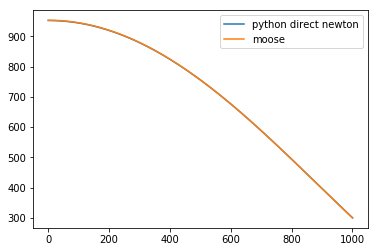

In [3]:
import pandas
temp = np.array([])
df = pandas.read_csv('moose.csv')
temp = df['temp'].values
print(temp)
plt.plot(x,sol,label='python direct newton')
plt.plot(np.linspace(0,temp.shape[0],temp.shape[0]),temp,label='moose')
plt.legend(loc='best')